**Importing the required libraries**

In [68]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

**Load Data**

In [69]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

In [70]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [45]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

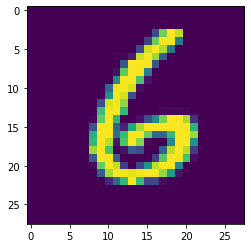

In [71]:
plt.imshow(x_train[6000])

In [49]:
np.argmax(y_train[6000])

0

**Reshaping DataSet**

In [50]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

**Applying One Hot Encoding**

In [51]:
number_of_classes = 10

In [52]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

**Add CNN Layers**

In [53]:
#create model
model=Sequential ()

In [54]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [55]:
#flatten the dimension of the image
model.add(Flatten())

In [56]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

**Compiling the model**

In [57]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [58]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

**Train the model**

In [59]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=32)

Epoch 1/2
1875/1875 [==============================] - 175s 93ms/step - loss: 0.2198 - accuracy: 0.9535 - val_loss: 0.0810 - val_accuracy: 0.9734
Epoch 2/2
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0671 - accuracy: 0.9798 - val_loss: 0.0792 - val_accuracy: 0.9766


**Observing the metrics**

In [60]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.07915771007537842, 0.9765999913215637]


**Test The Model**

In [61]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 54ms/step
[[1.7398862e-09 6.3224831e-10 1.3987761e-10 4.2540785e-05 5.3832828e-05
  1.4104106e-07 9.9453912e-10 2.1948097e-06 1.6939484e-04 9.9973196e-01]]


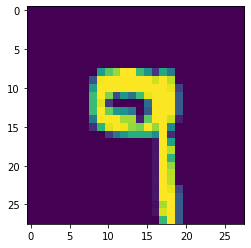

In [72]:
plt.imshow(x_test[6000])

In [64]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [65]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

**Save The Model**

In [73]:
# Save the model
model.save('models/mnistCNN.h5')

**Test the Saved Model**

In [76]:
#Importing the Keras libraries and packages
from tensorflow.keras.models import load_model
from PIL import Image #used for manipulating image uploaded by the user.
import numpy as np #used for numerrical analysis
model = load_model(r'models/mnistCNN.h5')

In [78]:
img = Image.open('mnist-dataset-9.png').convert("L") # convert image to monochrome
img = img.resize( (28, 28) ) # resizing of input image
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [79]:
# Predicting the Test set results
y_pred = model.predict(im2arr) #predicting the results
print(y_pred)

1/1 [==============================] - 0s 59ms/step
[[1.6684349e-03 1.1273418e-03 7.3860735e-07 4.1509781e-02 3.9552689e-02
  3.3290886e-05 2.8088087e-05 4.1342210e-03 3.0811829e-03 9.0886414e-01]]


In [80]:
import numpy as np
print(np.argmax(y_pred, axis=1)) #printing our Labels from first 4 images

[9]
